In [20]:
import pandas as pd
players_df = pd.read_csv('/content/acc_players-2324F.csv', header=0,skiprows=1, sep=',', encoding='latin1')

print("ACC Players")
display(players_df.head())

ACC Players


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


In [29]:
players_df.rename(columns={'PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists', 'MP': 'Minutes Played'}, inplace=True)
total_points = players_df['Points'].sum()
print('total points:')
display(total_points)

top_minutes_played = players_df[['Player', 'Minutes Played']].sort_values(by='Minutes Played', ascending=False).head(1)
print("Most Minutes Played")
display(top_minutes_played)

most_rebounds = players_df[['Player', 'Rebounds']].sort_values(by='Rebounds', ascending=False).head(5)
print("Top five most rebounds")
display(most_rebounds)


total points:


36907

Most Minutes Played


,Player,Minutes Played
135,Casey Morsell,1333


Top five most rebounds


,Player,Rebounds
5,Armando Bacot,380
178,Ian Schieffelin,340
90,Harrison Ingram,327
44,Mohamed Diarra,311
149,Norchad Omier,309


In [33]:
players_over_500_min_df = players_df[players_df['Minutes Played'] > 500]

top_assists = players_over_500_min_df[['Player', 'Assists']].sort_values(by='Assists', ascending=False).head(1)
print("Highest Assists with over 500 min played:")
display(top_assists)

assist_leads = players_df[['Player', 'Assists']].sort_values(by='Assists', ascending=False).head(3)
print("Top 3 assist leads")
display(assist_leads)

shot_blockers = players_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print("Top 3 rebound leads")
display(shot_blockers)

Highest Assists with over 500 min played:


,Player,Assists
7,Reece Beekman,212


Top 3 assist leads


,Player,Assists
7,Reece Beekman,212
215,Jaeden Zackery,152
21,Elliot Cadeau,150


Top 3 rebound leads


,Player,BLK
51,Ryan Dunn,77
157,Quinten Post,61
5,Armando Bacot,56


In [37]:
team_total_points = players_df.groupby('School')[['Points']].sum().reset_index()
print("Team total points")
display(team_total_points)

team_total_assists = players_df.groupby('School')[['Assists']].sum().reset_index()
print("Team total assists")
display(team_total_assists)

top_3_schools = team_total_points[['School', 'Points']].sort_values(by='Points', ascending=False).head(3)
print("Top Team Points")
display(top_3_schools)

Team total points


,School,Points
0,Boston College,2635
1,Clemson,2783
2,Duke,2738
3,Florida State,2444
4,Georgia Tech,2229
5,Louisville,2243
6,Miami (FL),2424
7,NC State,3097
8,North Carolina,3007
9,Notre Dame,2096


Team total assists


,School,Assists
0,Boston College,500
1,Clemson,533
2,Duke,544
3,Florida State,401
4,Georgia Tech,420
5,Louisville,355
6,Miami (FL),454
7,NC State,536
8,North Carolina,535
9,Notre Dame,329


Top Team Points


,School,Points
7,NC State,3097
8,North Carolina,3007
1,Clemson,2783


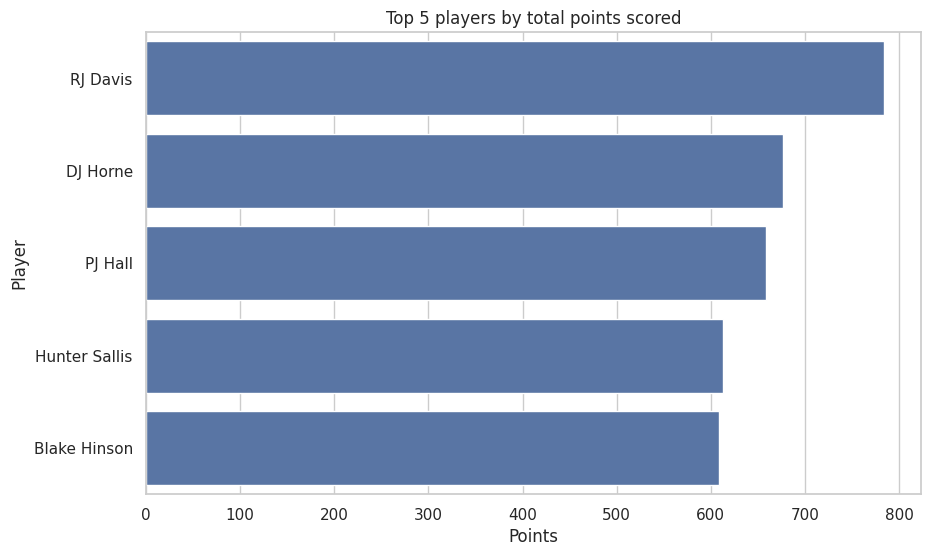

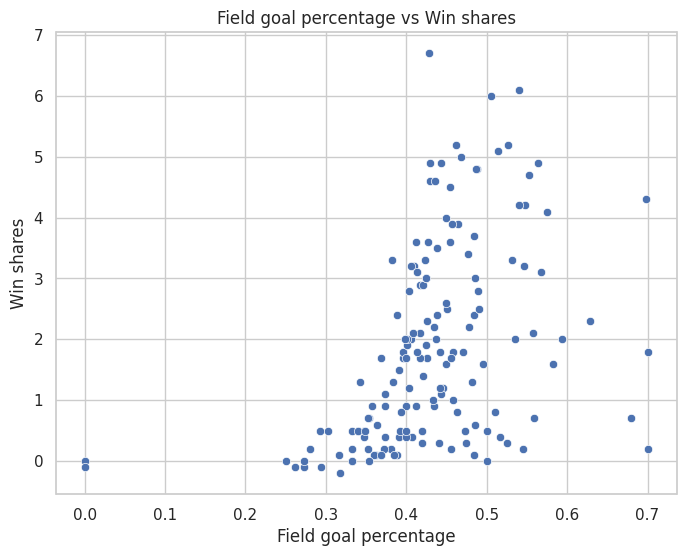

Correlation coefficent between feild goal percentage and win shares


0.4334177195258408

In [40]:
top_players_by_points = players_df[['Player', 'Points']].sort_values(by='Points', ascending=False).head(5)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Points', y='Player', data=top_players_by_points)
plt.title('Top 5 players by total points scored')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='FG%', y='WS', data=players_df)
plt.title('Field goal percentage vs Win shares')
plt.xlabel('Field goal percentage')
plt.ylabel('Win shares')
plt.grid(True)
plt.show()
correlation = players_df['FG%'].corr(players_df['WS'])
print("Correlation coefficent between feild goal percentage and win shares")
display(correlation)